In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.integrate import odeint
from scipy.integrate import solve_ivp
import pandas as pd

#Section 1 (Paper Replication)

## First Order ODEs modelling forest area of a particular year 


### init the conditions


In [189]:
df = pd.read_csv('ForestArea.csv')
print(df.head())
year = df['YEAR']
fa = df['FA']
TEMP = df['TEMP']
rf = df['RF']

   YEAR          FA      TEMP           RF
0  1990  1414222.68  9.234167  1173.613812
1  1991  1412192.36  9.179417  1173.613812
2  1992  1703242.13  8.836583  1173.497790
3  1993  1700438.49  8.866583  1173.613812
4  1994  1696563.57  9.038750  1173.613812


In [190]:
af = 0.063857; 
mf = 1412192.364;
bf = 1703242.134 - mf ;
init_year = 2010;
f0 = fa[init_year - 1990];

In [191]:
def dfdt(t, f):
  a2 = af * (1 + (2*mf)/(bf))
  b2 = -af/bf
  k2 = mf * af * (1 + (mf)/(bf))
  return k2 - a2*f - b2*(f**2)
 # for year 2010

Solve differential equation. There are two main solvers in scipy

* `odeint`: Pretty classic, uses a particular solve called lsoda from the FORTRAN library odepack
* `solve_ivp`: More customizable, can choose from a list of possible solvers

In [192]:
t = np.arange(1,10)
sol_m1 = odeint(dfdt, y0=f0, t=t, tfirst=True)
sol_m2 = solve_ivp(dfdt, t_span=(0,max(t)), y0=[f0], t_eval=t)

Look at the solution. It will become obvious why it is returned in this form once we deal with systems of ODEs (what these solvers are really meant for)

In [22]:
f_sol_m1 = sol_m1.T[0]
v_sol_m2 = sol_m2.y[0]

Plot

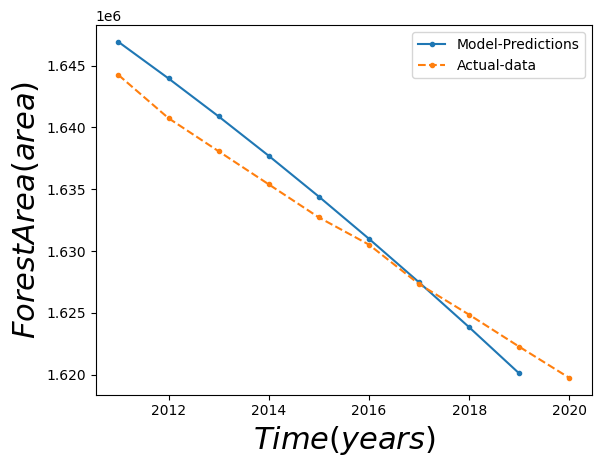

In [23]:
plt.plot(t + init_year , f_sol_m1, marker=".", label ='Model-Predictions')
# plt.plot(t + init_year, v_sol_m2, '--')
plt.plot(year[init_year - 1990 + 1 : ] , fa[init_year - 1990 + 1 : ], '--', marker=".", label ='Actual-data')
plt.ylabel('$ForestArea(area)$', fontsize=22)
plt.xlabel('$Time(years)$', fontsize=22)
plt.legend()
plt.show()

## First Order ODEs modelling Temperature of a particular year 


### init the conditions


In [218]:
at = 1; 
mt = min(TEMP);
bt = max(TEMP) - mt ;
init_year = 2001;
t0 = TEMP[init_year - 1990];

In [219]:
def dTdt(t, T):
  a1 = at * (1 + (2*mt)/(bt))
  b1 = at/bt
  k1 = - mt * at * (1 + (mt)/(bt))
  return k1 + a1*T - b1*(T**2)
 

Solve differential equation. There are two main solvers in scipy

* `odeint`: Pretty classic, uses a particular solve called lsoda from the FORTRAN library odepack
* `solve_ivp`: More customizable, can choose from a list of possible solvers

In [220]:
t = np.arange(2015 - init_year + 1)
sol_m1 = odeint(dTdt, y0=t0, t=t, tfirst=True)
sol_m2 = solve_ivp(dTdt, t_span=(0,max(t)), y0=[t0], t_eval=t)

Look at the solution. It will become obvious why it is returned in this form once we deal with systems of ODEs (what these solvers are really meant for)

In [221]:
f_sol_m1 = sol_m1.T[0]
v_sol_m2 = sol_m2.y[0]

Plot

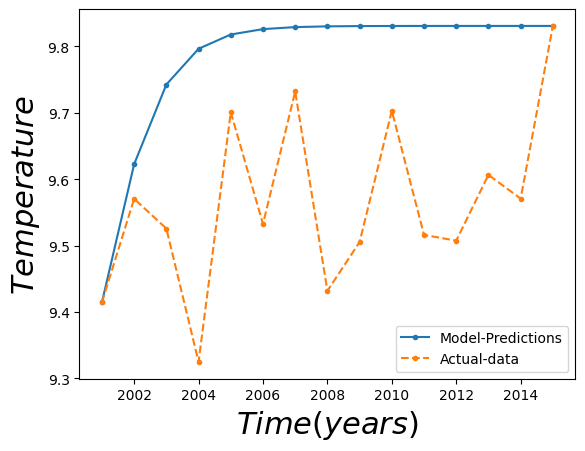

In [223]:
plt.plot(t + init_year , f_sol_m1, marker=".", label ='Model-Predictions')
# plt.plot(t + init_year, v_sol_m2, '--')
plt.plot(year[init_year - 1990 : ] , TEMP[init_year - 1990 : ], '--', marker=".", label ='Actual-data')
plt.ylabel('$Temperature$', fontsize=22)
plt.xlabel('$Time(years)$', fontsize=22)
plt.legend()
plt.show()

## Second Order ODEs For Modelling Rainfall

In [224]:
es = 10; 
init_year = 1990;
r0 = rf[init_year - 1990];
c = 10


In [225]:
def dSdx(x, S):
    x, v = S
    return [v,
           -(es**2)*(v*x - c)]
x_0 = r0
v_0 = r0
S_0 = (x_0, v_0)

In [226]:
t = np.arange(2019 - init_year + 1)
sol = odeint(dSdx, y0=S_0, t=t, tfirst=True)

In [227]:
x_sol = sol.T[0]
v_sol = sol.T[1]

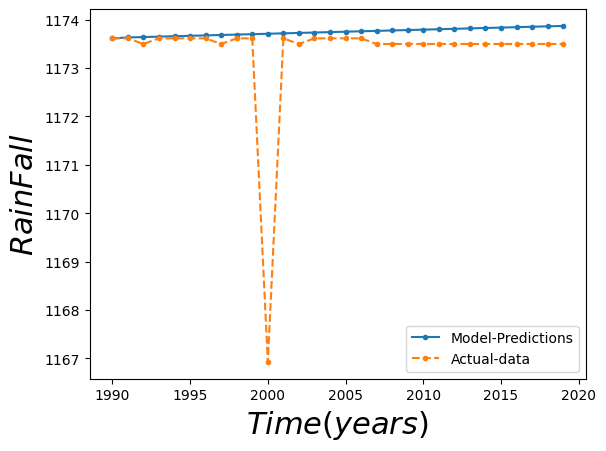

In [228]:
plt.plot(t + init_year, x_sol, marker=".", label ='Model-Predictions')
plt.plot(year[init_year - 1990 : ] , rf[init_year - 1990 : ], '--', marker=".", label ='Actual-data')
plt.ylabel('$RainFall$', fontsize=22)
plt.xlabel('$Time(years)$', fontsize=22)
plt.legend()
plt.show()

This process can be repeated for third order (required defining two new variables) fourth order (requires defining three new variables) and so on...

#Section 2 (Our Method)

## Coupled First Order And Second Order ODEs


constants for forest

In [84]:
init_year = 2010

In [173]:
af = 0.063857; 
mf = 1412192.364;
bf = 1703242.134 - mf ;
f0 = fa[init_year - 1990];
# New conditions
cf = -10


coditions for temperature

In [174]:
at = 1; 
mt = min(TEMP);
bt = max(TEMP) - mt ;
t0 = TEMP[init_year - 1990];
## New condition
qt = 0

The coupled equation

In [183]:
def dSdt(t, S):
    f, T = S
    ## Forest parameters
    a2 = af * (1 + (2*mf)/(bf))
    b2 = -af/bf
    k2 = mf * af * (1 + (mf)/(bf))
    ## Temperature parameters
    a1 = at * (1 + (2*mt)/(bt))
    b1 = at/bt
    k1 = - mt * at * (1 + (mt)/(bt))
   
    return [k2 - a2*f - b2*(f**2) - cf*T ,
            k1 + a1*T - b1*(T**2)  - qt*f]
f_0 = f0
T_0 = t0

S_0 = (f_0, T_0)

In [184]:
t = np.arange(1,10)
sol = odeint(dSdx, y0=S_0, t=t, tfirst=True)
sol2 = solve_ivp(dSdx, (0,10), y0=[f_0, T_0],
                t_eval=t)

In [185]:
y1_sol = sol.T[0]
y2_sol = sol.T[1]
if cf == 0: temp_sol = y1_sol

# sol_1 = sol2.y[0]
# sol_2 = sol2.y[1]

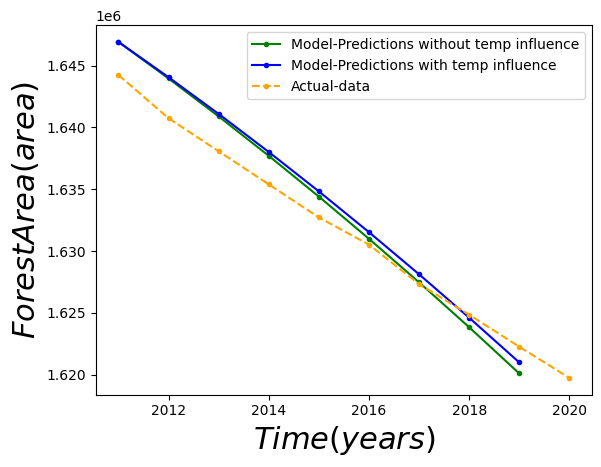

In [188]:
plt.plot(t + init_year , temp_sol, marker=".", label ='Model-Predictions without temp influence', color = 'green')
plt.plot(t + init_year , y1_sol, marker=".", label ='Model-Predictions with temp influence', color = 'blue')
plt.plot(year[init_year - 1990 + 1 : ] , fa[init_year - 1990 + 1 : ], '--', marker=".", label ='Actual-data', color = 'orange')
plt.ylabel('$ForestArea(area)$', fontsize=22)
plt.xlabel('$Time(years)$', fontsize=22)
plt.legend()
plt.show()